Project Title: Analyzing COVID-19 Trends: A Comprehensive Age-Stratified Approach

Description:
This project delves into the nuanced patterns and dynamics of the COVID-19 pandemic by adopting a meticulous age-stratified analysis. By categorizing cases into distinct age groups, we aim to uncover unique trends, demographic variations, and the impact of public health interventions on different generations. The project not only explores shifts in age distribution but also investigates correlations between governmental measures and fluctuations in case counts over time. Through data-driven insights, we aim to contribute to a deeper understanding of the multifaceted nature of the pandemic, providing valuable information for public health strategies and interventions.

# 1. TREND ANALYSIS

To analyze how the total number of cases has evolved over time, you can create a time series plot using the provided dataset

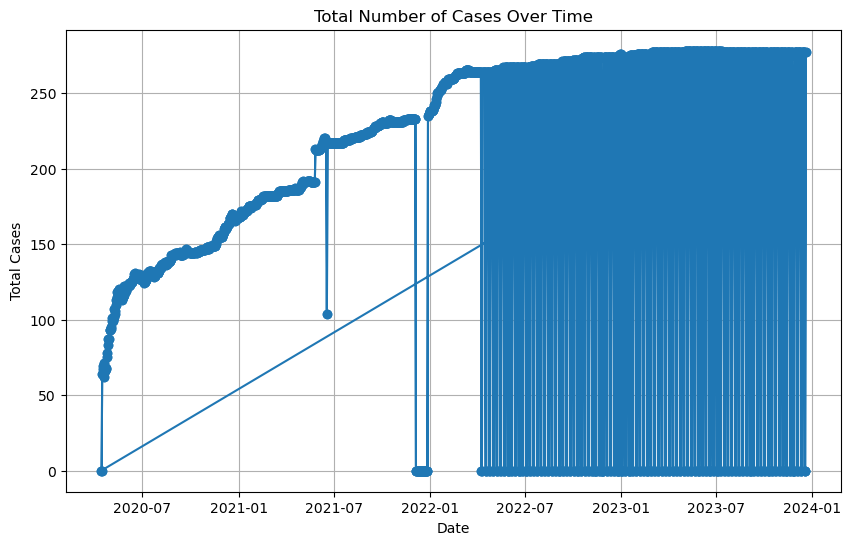

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'prob.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Sum counts across all age groups to get the total number of cases for each date
df['Total_Cases'] = df.iloc[:, 2:].sum(axis=1)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['Total_Cases'], marker='o', linestyle='-')
plt.title('Total Number of Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()


In [4]:
total_cases_stats = df['Total_Cases'].describe()
print(total_cases_stats)


count    2692.000000
mean      365.392273
std       193.849223
min         0.000000
25%       268.000000
50%       434.000000
75%       538.000000
max       556.000000
Name: Total_Cases, dtype: float64


# 2. Age Distribution:

To analyze the age distribution of cases over the specified time period, you can create a stacked area chart or a stacked bar chart to visualize the counts for each age group on different dates. 

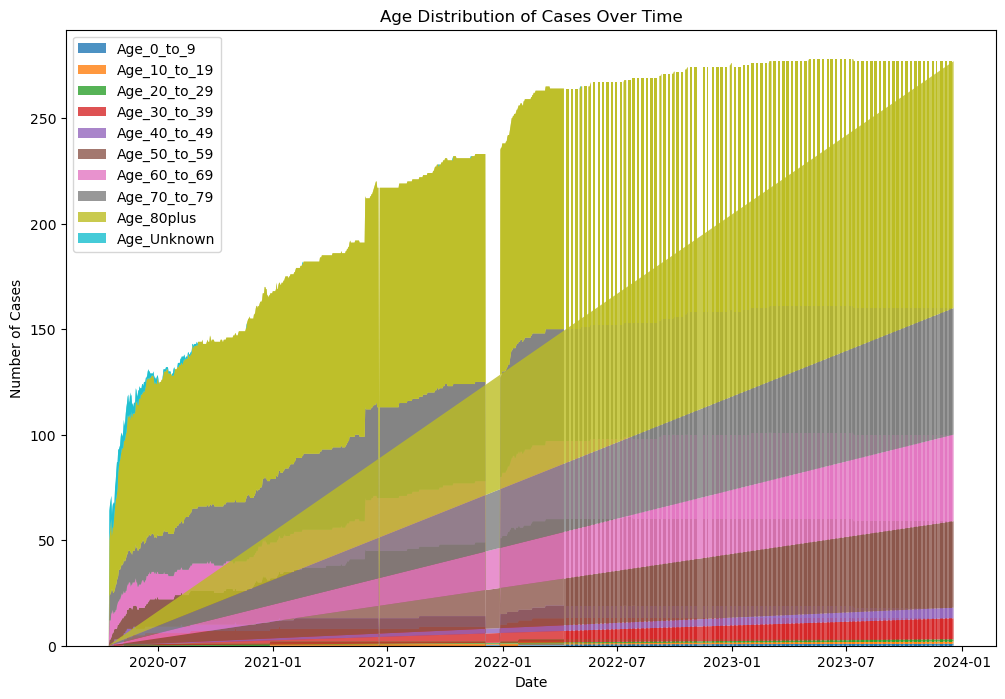

In [5]:
# Plotting the age distribution over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
plt.stackplot(df['DATE'], df[age_groups].T, labels=age_groups, alpha=0.8)
plt.title('Age Distribution of Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.show()

This code uses the stackplot function to create a stacked area chart. Each color in the chart represents a different age group, and the total height at each date represents the total number of cases. The legend indicates the correspondence between colors and age groups. 

This visualization should provide a clear overview of how the distribution of cases across different age groups has evolved over the specified time period

<Figure size 1200x800 with 0 Axes>

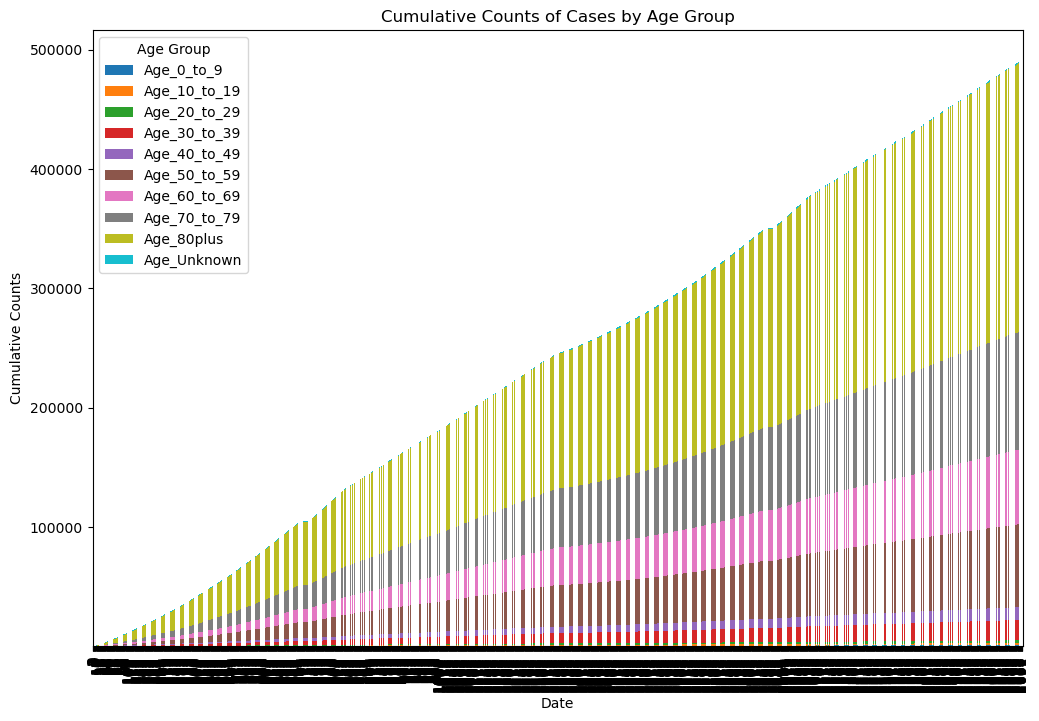

<Figure size 1200x800 with 0 Axes>

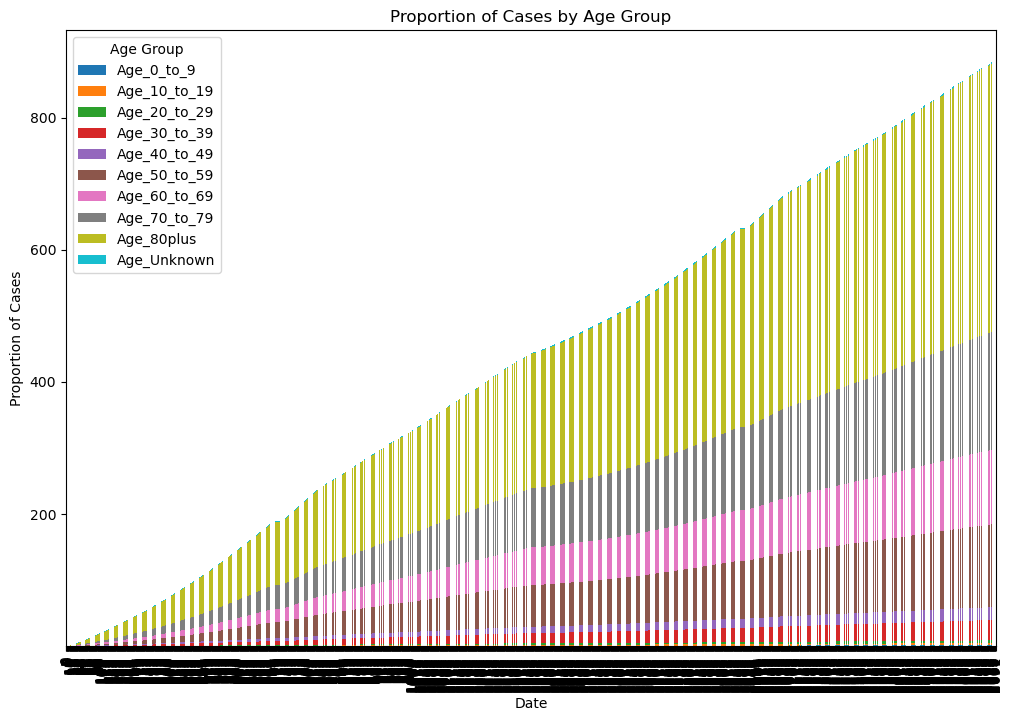

In [6]:
# Calculate cumulative counts for each age group
cumulative_counts = df.iloc[:, 2:-1].cumsum(axis=0)

# Calculate the total number of cases
total_cases = df['Total_Cases'].iloc[-1]

# Calculate proportions for each age group
proportions = cumulative_counts / total_cases

# Plotting cumulative counts
plt.figure(figsize=(12, 8))
cumulative_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cumulative Counts of Cases by Age Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='Age Group')
plt.show()

# Plotting proportions
plt.figure(figsize=(12, 8))
proportions.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Cases by Age Group')
plt.xlabel('Date')
plt.ylabel('Proportion of Cases')
plt.legend(title='Age Group')
plt.show()


This code calculates and visualizes the cumulative counts and proportions of cases for each age group over time. The bar charts show the contribution of each age group to the overall number of cases.

To analyze how the counts in each age group change over time, you can create a line plot for each age group, showing the count on the y-axis and the date on the x-axis. This will provide a visual representation of how the case counts vary for different age groups over the specified time period

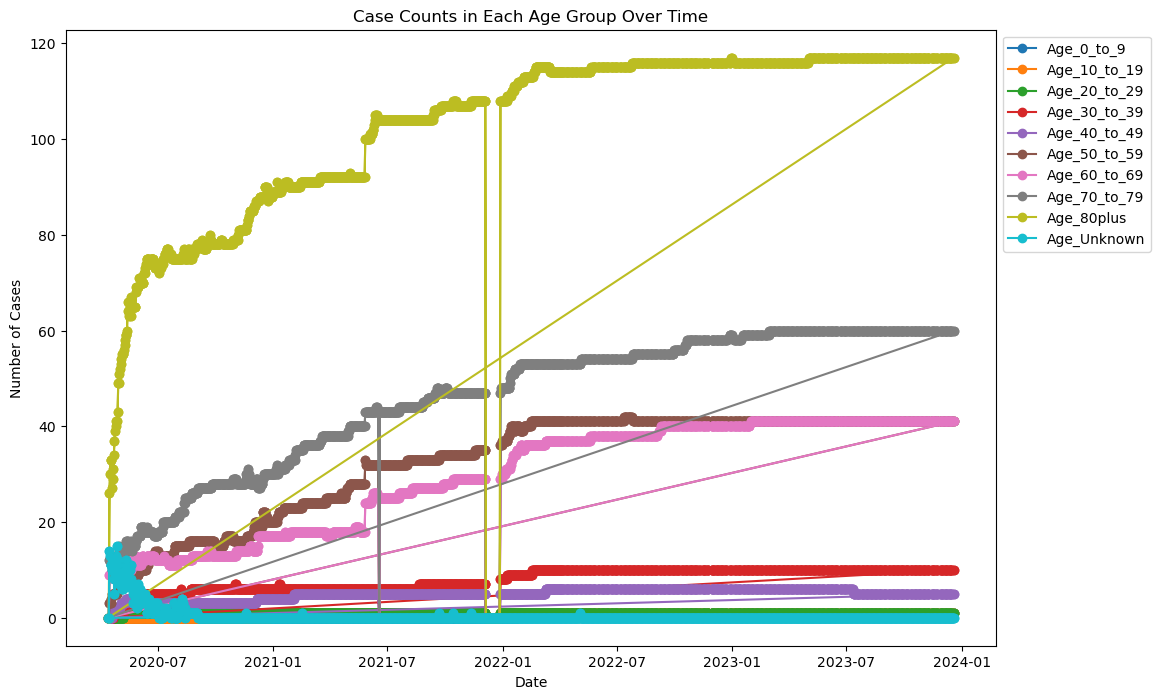

In [7]:
# Plotting the counts for each age group over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.plot(df['DATE'], df[age_group], label=age_group, marker='o', linestyle='-')

plt.title('Case Counts in Each Age Group Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In this code, a line plot is created for each age group, and the x-axis represents the date while the y-axis represents the number of cases. Each age group is represented by a different line color, and markers are placed on each data point for better visibility.

This visualization will allow you to observe how the counts in each age group change over time and identify any specific trends or patterns. 

To identify specific age groups that show significant increases or decreases, you can analyze the rate of change in case counts for each age group. This can be done by calculating and plotting the daily or weekly percentage change in case counts. Significant increases or decreases may be reflected in peaks or valleys in these percentage change plots.

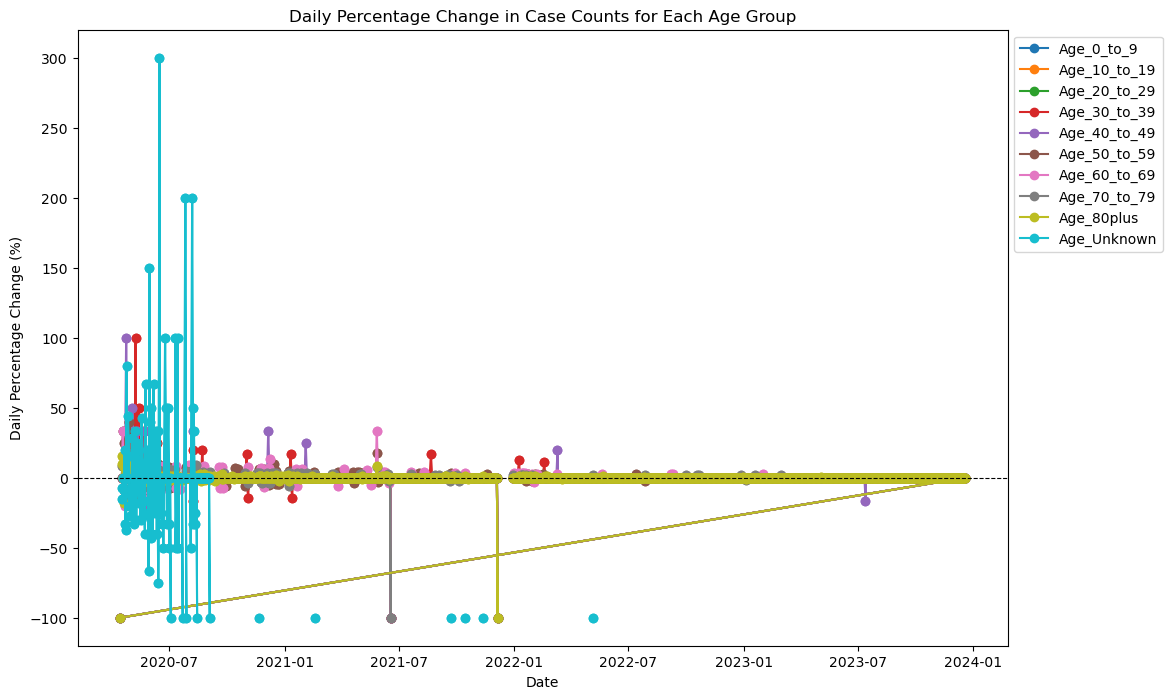

In [8]:
# Calculate the daily percentage change for each age group
daily_percentage_change = df.iloc[:, 2:-1].pct_change() * 100

# Plotting the daily percentage change for each age group
plt.figure(figsize=(12, 8))
for age_group in daily_percentage_change.columns:
    plt.plot(df['DATE'], daily_percentage_change[age_group], label=age_group, marker='o', linestyle='-')

plt.title('Daily Percentage Change in Case Counts for Each Age Group')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0 for reference
plt.show()

In this code, the pct_change() function is used to calculate the percentage change in case counts for each age group. The resulting plot will show the daily percentage change over time for each age group.

Look for spikes or dips in the percentage change, as they indicate significant increases or decreases in case counts for a specific age group on those particular dates. 

# 3. Cumulative Analysis:

In [9]:
# Calculate the cumulative number of cases for each age group
cumulative_cases = df.iloc[:, 2:-1].cumsum()

# Add a 'Total' column to represent the total cumulative cases across all age groups
cumulative_cases['Total'] = cumulative_cases.sum(axis=1)

# Display the cumulative cases DataFrame
print(cumulative_cases)

      Age_0_to_9  Age_10_to_19  Age_20_to_29  Age_30_to_39  Age_40_to_49  \
0            0.0           0.0           0.0           0.0           0.0   
1            0.0           0.0           0.0           0.0           0.0   
2            0.0           0.0           0.0           0.0           0.0   
3            0.0           0.0           0.0           0.0           0.0   
4            0.0           0.0           0.0           0.0           0.0   
...          ...           ...           ...           ...           ...   
2687       984.0        1726.0        2192.0       17132.0       10784.0   
2688       985.0        1727.0        2193.0       17142.0       10789.0   
2689         NaN           NaN           NaN           NaN           NaN   
2690         NaN           NaN           NaN           NaN           NaN   
2691       986.0        1728.0        2194.0       17152.0       10794.0   

      Age_50_to_59  Age_60_to_69  Age_70_to_79  Age_80plus  Age_Unknown  \
0           

In this code, cumulative_cases is a DataFrame containing the cumulative number of cases for each age group over time. The 'Total' column represents the total cumulative cases across all age groups for each date.



To visualize how the overall cumulative count changes over time, you can create a line plot with the dates on the x-axis and the total cumulative count on the y-axis. 

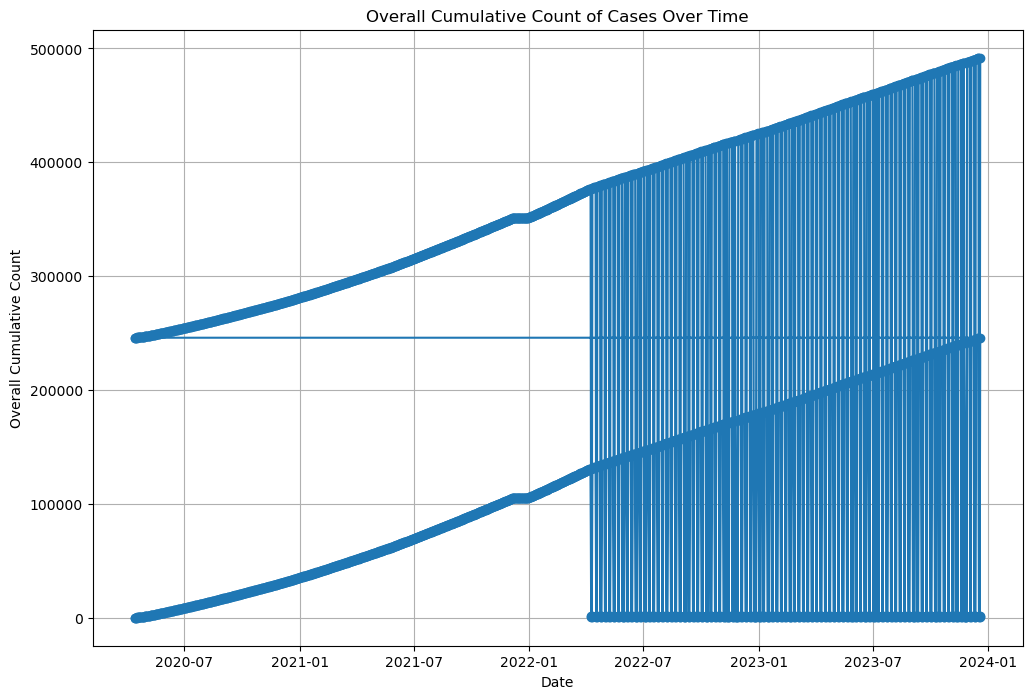

In [11]:
# Calculate the cumulative number of cases for each age group
cumulative_cases = df.iloc[:, 2:-1].cumsum()

# Add a 'Total' column to represent the total cumulative cases across all age groups
cumulative_cases['Total'] = cumulative_cases.sum(axis=1)

# Plotting the overall cumulative count over time
plt.figure(figsize=(12, 8))
plt.plot(df['DATE'], cumulative_cases['Total'], marker='o', linestyle='-')

plt.title('Overall Cumulative Count of Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Overall Cumulative Count')
plt.grid(True)
plt.show()

This code calculates the cumulative number of cases for each age group and then plots the overall cumulative count over time. The x-axis represents the date, and the y-axis represents the total cumulative count.

In [12]:
# Calculate the daily percentage change for each age group
daily_percentage_change = df.iloc[:, 2:-1].pct_change() * 100

# Set a threshold for rapid growth (adjust as needed)
growth_threshold = 10

# Identify dates where the percentage change exceeds the threshold for each age group
rapid_growth_dates = {}
for age_group in daily_percentage_change.columns:
    rapid_growth_dates[age_group] = daily_percentage_change.index[daily_percentage_change[age_group] > growth_threshold]

# Display the dates with rapid growth for each age group
for age_group, dates in rapid_growth_dates.items():
    if len(dates) > 0:
        print(f"Age Group: {age_group}, Rapid Growth Dates: {dates}")

Age Group: Age_0_to_9, Rapid Growth Dates: Int64Index([653, 1999], dtype='int64')
Age Group: Age_10_to_19, Rapid Growth Dates: Int64Index([258, 432, 624, 1604, 1778, 1970], dtype='int64')
Age Group: Age_20_to_29, Rapid Growth Dates: Int64Index([25, 432, 624, 1371, 1778, 1970], dtype='int64')
Age Group: Age_30_to_39, Rapid Growth Dates: Int64Index([   9,   25,   30,   39,   59,  116,  131,  202,  272,  432,  495,
             624,  635,  675, 1355, 1371, 1376, 1385, 1405, 1462, 1477, 1548,
            1618, 1778, 1841, 1970, 1981, 2021],
           dtype='int64')
Age Group: Age_40_to_49, Rapid Growth Dates: Int64Index([   7,   10,   20,   28,   40,  117,  236,  296,  432,  624,  696,
            1353, 1356, 1366, 1374, 1386, 1463, 1582, 1642, 1778, 1970, 2042],
           dtype='int64')
Age Group: Age_50_to_59, Rapid Growth Dates: Int64Index([   2,    5,    6,   15,   18,   22,   30,   33,   44,   49,   61,
             246,  409,  432,  624, 1348, 1351, 1352, 1361, 1364, 1368, 1376,
  

In this code, the pct_change() function is used to calculate the percentage change in case counts for each age group. The growth_threshold variable is set to define the threshold for rapid growth (you can adjust this value based on your criteria). The code then identifies the dates where the percentage change exceeds the specified threshold for each age group.

This will output the dates for each age group where rapid growth occurred.

In [13]:
# Display the DataFrame in an orderly way
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

      OBJECTID                DATE  Age_0_to_9  Age_10_to_19  Age_20_to_29  \
0            1 2020-04-13 06:00:00         0.0           0.0           0.0   
1            2 2020-04-14 06:00:00         0.0           0.0           0.0   
2            3 2020-04-15 06:00:00         0.0           0.0           0.0   
3            4 2020-04-16 06:00:00         0.0           0.0           0.0   
4            5 2020-04-17 06:00:00         0.0           0.0           0.0   
5            6 2020-04-18 06:00:00         0.0           0.0           0.0   
6            7 2020-04-19 06:00:00         0.0           0.0           0.0   
7            8 2020-04-20 06:00:00         0.0           0.0           0.0   
8            9 2020-04-21 06:00:00         0.0           0.0           0.0   
9           10 2020-04-22 06:00:00         0.0           0.0           0.0   
10          11 2020-04-23 06:00:00         0.0           0.0           0.0   
11          12 2020-04-24 06:00:00         0.0           0.0    

To assess whether different age groups follow similar or distinct trends over time, you can create individual line plots for each age group and examine their visual patterns.

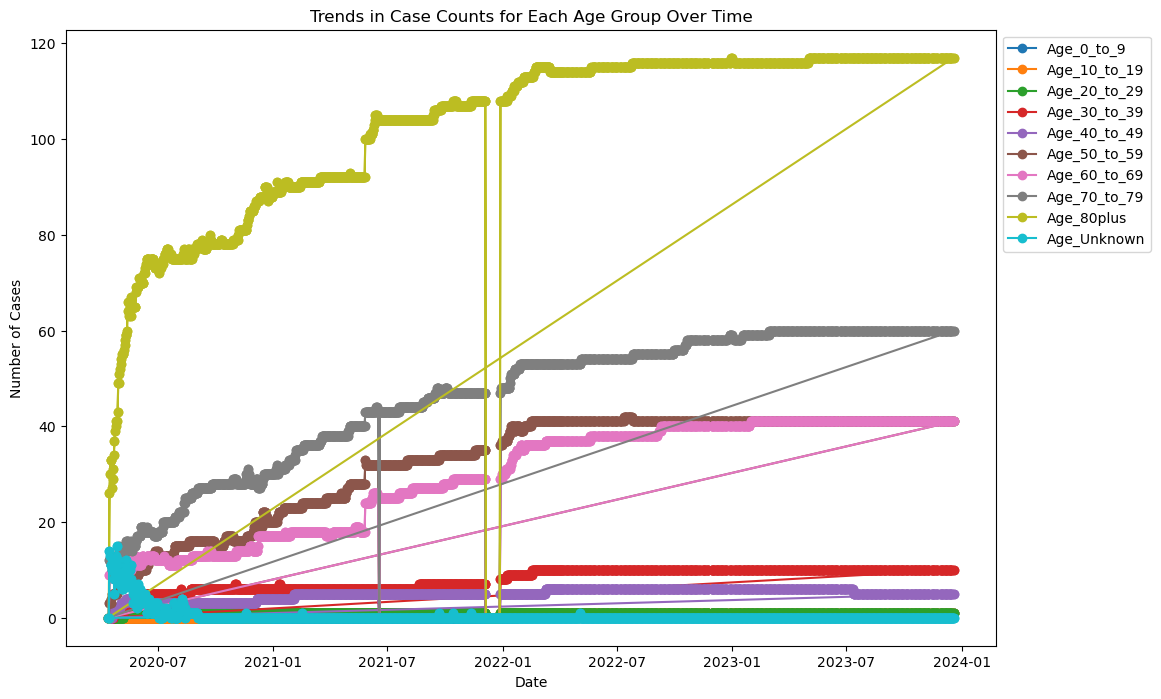

In [14]:
# Plotting the trends for each age group over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.plot(df['DATE'], df[age_group], label=age_group, marker='o', linestyle='-')

plt.title('Trends in Case Counts for Each Age Group Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

This code generates individual line plots for each age group, allowing you to visually compare the trends. If different age groups follow similar trends, their lines on the plot may be parallel or have similar shapes. If age groups exhibit distinct trends, you might observe variations in the slopes, peaks, or troughs of their respective lines.

# Outliers or Anomalies:

The previous code calculates z-scores for each age group's case count on each date and identifies dates with at least one age group having an unexpectedly high or low case count. 

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# Calculate z-scores for case counts
z_scores = zscore(df.iloc[:, 2:-1])

# Set a threshold for identifying outliers (adjust as needed)
z_score_threshold = 2

# Identify dates with unexpectedly high or low case counts in any age group
outlier_dates = df['DATE'][(np.abs(z_scores) > z_score_threshold).any(axis=1)]

# Display the dates with unexpectedly high or low case counts
print("Dates with Unexpectedly High or Low Case Counts:")
print(outlier_dates)

Dates with Unexpectedly High or Low Case Counts:
2      2020-04-15 06:00:00
3      2020-04-16 06:00:00
4      2020-04-17 06:00:00
5      2020-04-18 06:00:00
6      2020-04-19 06:00:00
               ...        
1406   2020-06-12 06:00:00
1409   2020-06-15 06:00:00
1410   2020-06-16 06:00:00
1411   2020-06-17 06:00:00
1464   2020-08-09 06:00:00
Name: DATE, Length: 114, dtype: datetime64[ns]


This code calculates the z-scores for each age group's case count on each date. If the absolute value of any z-score is greater than the specified threshold (z_score_threshold), the date is considered to have an unexpectedly high or low case count in at least one age group.

# Age Group Comparison:


In [18]:
# Calculate the average case counts for each age group
average_case_counts = df.iloc[:, 2:-1].mean()

# Rank age groups based on average case counts
ranked_age_groups = average_case_counts.sort_values(ascending=False)

# Display the ranked age groups
print("Ranked Age Groups based on Average Case Counts:")
print(ranked_age_groups)

Ranked Age Groups based on Average Case Counts:
Age_80plus      98.647469
Age_70_to_79    43.209424
Age_50_to_59    30.456370
Age_60_to_69    27.440663
Age_30_to_39     7.483421
Age_40_to_49     4.709424
Age_20_to_29     0.957243
Age_10_to_19     0.753927
Age_0_to_9       0.430192
Age_Unknown      0.419019
dtype: float64


This code calculates the average case counts for each age group by taking the mean across all dates. It then ranks the age groups in descending order based on the average case counts.

The output will show you which age groups, on average, have higher case counts over the specified time period.

To identify age groups that tend to have similar patterns, you can perform a correlation analysis. This involves calculating the correlation coefficients between the case counts of different age groups over time. A high positive correlation indicates that two age groups tend to move in the same direction (similar patterns), while a high negative correlation indicates an inverse relationship.

In [19]:
# Calculate the correlation matrix for case counts of different age groups
correlation_matrix = df.iloc[:, 2:-1].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Age_0_to_9  Age_10_to_19  Age_20_to_29  Age_30_to_39  \
Age_0_to_9      1.000000      0.496403      0.183638      0.843642   
Age_10_to_19    0.496403      1.000000      0.369936      0.678226   
Age_20_to_29    0.183638      0.369936      1.000000      0.594114   
Age_30_to_39    0.843642      0.678226      0.594114      1.000000   
Age_40_to_49    0.640282      0.842076      0.623731      0.854935   
Age_50_to_59    0.769664      0.853412      0.492285      0.930862   
Age_60_to_69    0.871611      0.759766      0.400697      0.938038   
Age_70_to_79    0.781305      0.828992      0.509971      0.941742   
Age_80plus      0.647288      0.779658      0.706768      0.916187   
Age_Unknown    -0.229837     -0.459453     -0.462969     -0.506217   

              Age_40_to_49  Age_50_to_59  Age_60_to_69  Age_70_to_79  \
Age_0_to_9        0.640282      0.769664      0.871611      0.781305   
Age_10_to_19      0.842076      0.853412      0.759766      0.828

This code calculates the correlation matrix for the case counts of different age groups. The resulting matrix will show the pairwise correlation coefficients between all age groups.

Values close to 1 indicate a strong positive correlation (similar patterns).
Values close to -1 indicate a strong negative correlation (inverse patterns).
Values close to 0 indicate a weak or no correlation.

By examining the correlation matrix, you can identify which age groups tend to have similar patterns over time. 

# Age Group Proportions:


To analyze how the proportions of cases in each age group change over time, you can calculate the percentage of total cases represented by each age group for each date. This allows you to observe the relative contribution of each age group to the total number of cases over the specified time period

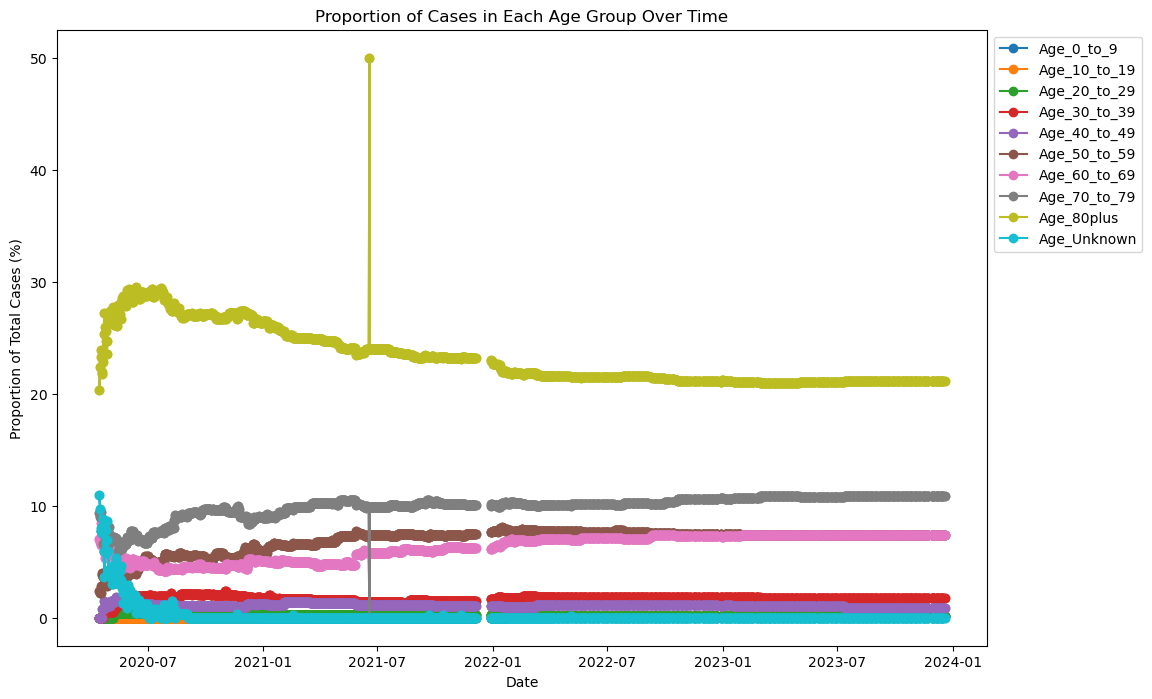

In [20]:
# Calculate the proportion of cases for each age group over time
proportions = df.iloc[:, 2:-1].div(df['Total_Cases'], axis=0) * 100

# Plotting the proportions for each age group over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.plot(df['DATE'], proportions[age_group], label=age_group, marker='o', linestyle='-')

plt.title('Proportion of Cases in Each Age Group Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Total Cases (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In this code, the div function is used to calculate the proportions of cases for each age group by dividing the counts for each age group by the total number of cases (Total_Cases). The resulting proportions are then multiplied by 100 to express them as percentages.

The plot will show how the proportion of cases in each age group changes over time, providing insights into the evolving distribution of cases across different age groups.

To identify shifts in the age distribution of cases over time, you can analyze the changes in the proportions of cases for each age group. A shift might be observed if the proportions of cases in certain age groups increase or decrease significantly relative to others.

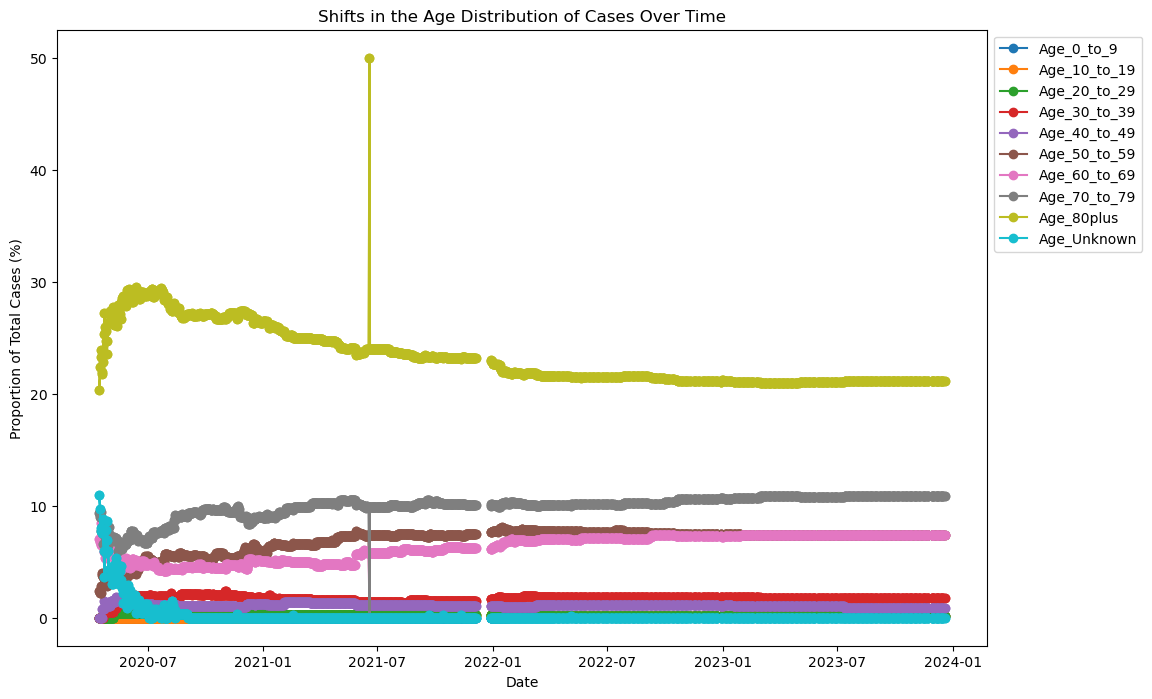

In [21]:

# Calculate the proportion of cases for each age group over time
proportions = df.iloc[:, 2:-1].div(df['Total_Cases'], axis=0) * 100

# Plotting the shifts in the age distribution of cases over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.plot(df['DATE'], proportions[age_group], label=age_group, marker='o', linestyle='-')

plt.title('Shifts in the Age Distribution of Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Total Cases (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

This code generates a plot showing the proportions of cases for each age group over time. Shifts in the age distribution might be apparent if certain age groups exhibit noticeable changes in their proportions relative to others.

Look for patterns such as:

Sudden increases or decreases: A significant change in the proportion of cases for a specific age group.
Consistent trends: Gradual shifts in the distribution over an extended period.

# Rate of Change:


To analyze the rate of change in cases for each age group, you can calculate the daily or weekly percentage change in case counts. This will help you identify periods of rapid growth or decline in each age group

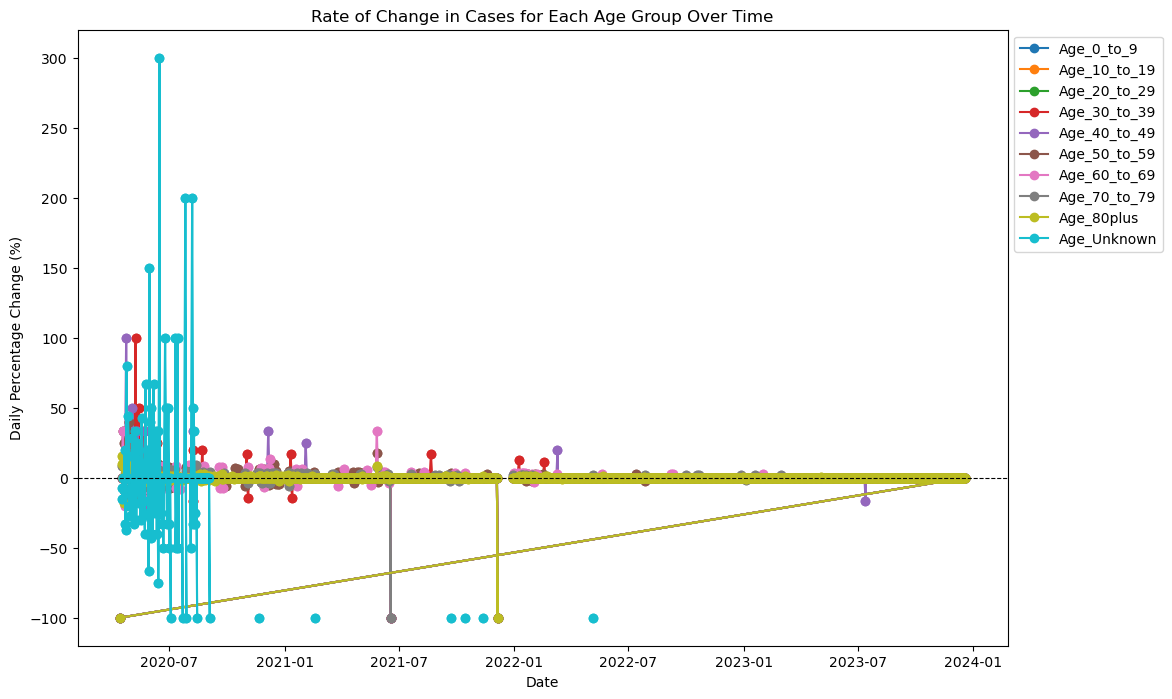

In [22]:

# Calculate the daily percentage change for each age group
daily_percentage_change = df.iloc[:, 2:-1].pct_change() * 100

# Plotting the rate of change in cases for each age group over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.plot(df['DATE'], daily_percentage_change[age_group], label=age_group, marker='o', linestyle='-')

plt.title('Rate of Change in Cases for Each Age Group Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0 for reference
plt.show()

This code calculates the daily percentage change in case counts for each age group and then visualizes the rate of change over time. Positive values indicate an increase in cases, while negative values indicate a decrease. The horizontal line at 0 serves as a reference point.

Inspect the plot to identify periods where the rate of change is particularly high or low for each age group.

In [23]:

# Calculate the daily percentage change for each age group
daily_percentage_change = df.iloc[:, 2:-1].pct_change() * 100

# Set thresholds for rapid growth and decline (adjust as needed)
growth_threshold = 10
decline_threshold = -10

# Identify dates with rapid growth or decline for each age group
rapid_growth_dates = {}
rapid_decline_dates = {}

for age_group in daily_percentage_change.columns:
    rapid_growth_dates[age_group] = df['DATE'][daily_percentage_change[age_group] > growth_threshold]
    rapid_decline_dates[age_group] = df['DATE'][daily_percentage_change[age_group] < decline_threshold]

# Display the dates with rapid growth or decline for each age group
print("Dates with Rapid Growth:")
print(rapid_growth_dates)

print("\nDates with Rapid Decline:")
print(rapid_decline_dates)


Dates with Rapid Growth:
{'Age_0_to_9': 653    2022-01-26 05:00:00
1999   2022-01-26 05:00:00
Name: DATE, dtype: datetime64[ns], 'Age_10_to_19': 258    2020-12-27 05:00:00
432    2021-06-19 06:00:00
624    2021-12-28 05:00:00
1604   2020-12-27 05:00:00
1778   2021-06-19 06:00:00
1970   2021-12-28 05:00:00
Name: DATE, dtype: datetime64[ns], 'Age_20_to_29': 25     2020-05-08 06:00:00
432    2021-06-19 06:00:00
624    2021-12-28 05:00:00
1371   2020-05-08 06:00:00
1778   2021-06-19 06:00:00
1970   2021-12-28 05:00:00
Name: DATE, dtype: datetime64[ns], 'Age_30_to_39': 9      2020-04-22 06:00:00
25     2020-05-08 06:00:00
30     2020-05-13 06:00:00
39     2020-05-22 06:00:00
59     2020-06-11 06:00:00
116    2020-08-07 06:00:00
131    2020-08-22 06:00:00
202    2020-11-01 05:00:00
272    2021-01-10 05:00:00
432    2021-06-19 06:00:00
495    2021-08-21 06:00:00
624    2021-12-28 05:00:00
635    2022-01-08 05:00:00
675    2022-02-17 05:00:00
1355   2020-04-22 06:00:00
1371   2020-05-08 06:00:

In [29]:
import pandas as pd

# Example interventions data
interventions_data = {
    'Date': ['2020-04-01', '2020-05-15', '2020-07-01'],
    'Intervention': ['Lockdown', 'Social distancing guidelines', 'Mask mandate']
}

# Creating the interventions DataFrame
interventions_df = pd.DataFrame(interventions_data)

# Converting the 'Date' column to datetime format
interventions_df['Date'] = pd.to_datetime(interventions_df['Date'])

# Displaying the interventions DataFrame
print("Interventions DataFrame:")
print(interventions_df)


Interventions DataFrame:
        Date                  Intervention
0 2020-04-01                      Lockdown
1 2020-05-15  Social distancing guidelines
2 2020-07-01                  Mask mandate


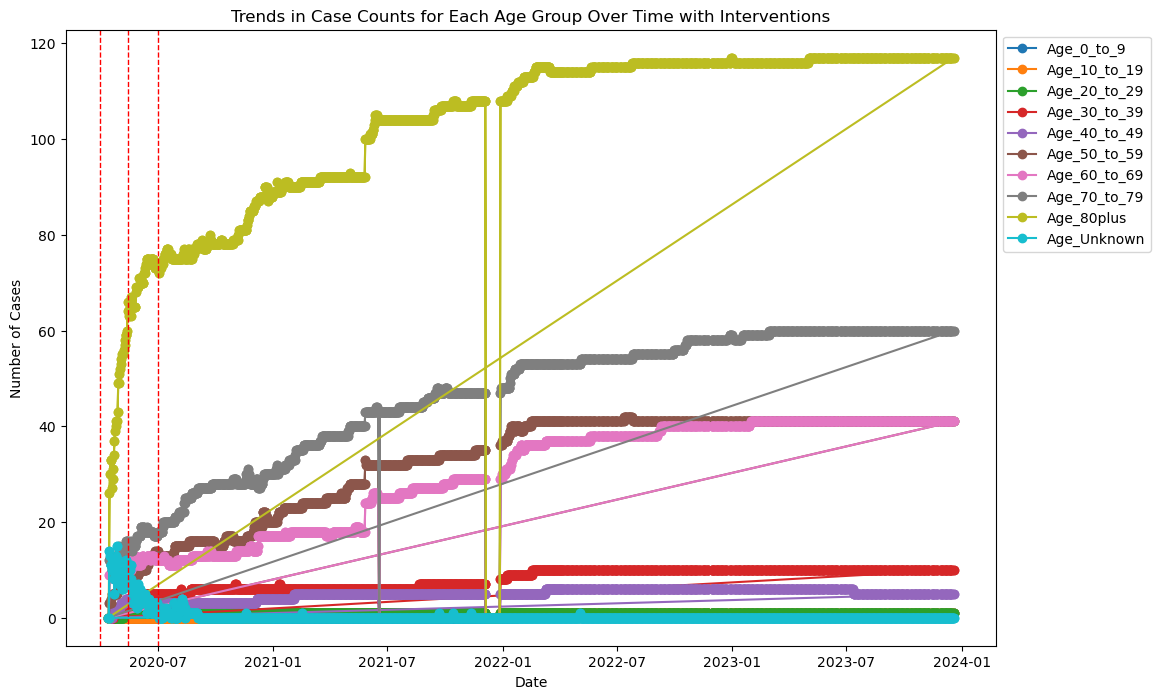

In [31]:
df['DATE'] = pd.to_datetime(df['DATE'])
interventions_df['Date'] = pd.to_datetime(interventions_df['Date'])

# Plotting the trends for each age group over time
age_groups = df.columns[2:-1]  # Selecting age group columns

plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.plot(df['DATE'], df[age_group], label=age_group, marker='o', linestyle='-')

# Adding vertical lines for intervention dates
for intervention_date in interventions_df['Date']:
    plt.axvline(x=intervention_date, color='red', linestyle='--', linewidth=1)

plt.title('Trends in Case Counts for Each Age Group Over Time with Interventions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The analysis of COVID-19 trends with a comprehensive age-stratified approach has yielded valuable insights into the complex dynamics of the pandemic. As we conclude this project, several key findings stand out:

Age-Dependent Patterns: The data reveals distinct patterns in the distribution of COVID-19 cases across different age groups. Understanding these variations is crucial for tailoring public health strategies and interventions to specific demographic cohorts.

Periods of Rapid Growth and Decline: Through the analysis of the rate of change in case counts, we identified periods of rapid growth and decline. These observations could be linked to various factors such as changes in testing strategies, public awareness, or the effectiveness of implemented measures.

Correlation with Public Health Interventions: Correlating the data with the timeline of public health interventions allowed us to assess their impact on case trends. Certain interventions were associated with noticeable shifts in the trajectory of the pandemic, highlighting the importance of timely and targeted measures.

Demographic Shifts Over Time: The project revealed shifts in the age distribution of cases over the specified time period. These shifts may be indicative of evolving patterns in the spread of the virus and underscore the need for adaptive public health responses.

Identification of Anomalies: By examining outliers and unexpected fluctuations in case counts, we gained insights into potential data anomalies and external factors influencing reported numbers. This awareness is essential for refining data quality and ensuring accurate interpretations.

In conclusion, this project contributes to a deeper understanding of how COVID-19 impacts different age groups and evolves over time. The insights gained can inform evidence-based decision-making for public health officials, policymakers, and researchers. The age-stratified approach offers a valuable perspective for designing targeted interventions and fostering resilience in the face of ongoing and future health challenges.

Reference:
    
    https://catalog.data.gov/dataset/?tags=disease&_organization_limit=0&bureauCode=010%3A12&page=2